#Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Let's import the libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
books=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BX_Books.csv',sep=';',encoding='latin-1')
rating=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BX-Book-Ratings.csv',sep=';',encoding='latin-1')
users=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BX-Users.csv',sep=';',encoding='latin-1')


In [ ]:
print(books.columns)
books.shape

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


(271379, 8)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
print(users.columns)
users.shape

Index(['User-ID', 'Location', 'Age'], dtype='object')


(278858, 3)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
print(rating.columns)
rating.shape

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


(1149780, 3)

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


#Data preprocessing

In [ ]:
columns_book = {
    'ISBN': 'ISBN',
    'Book-Title': 'Book_Title',
    'Book-Author': 'Book_Author',
    'Year-Of-Publication': 'Year_Of_Publication',
    'Publisher': 'Publisher',
    'Image-URL-S': 'Image_URL_S',
    'Image-URL-M': 'Image_URL_M',
    'Image-URL-L': 'Image_URL_L'
}
books.rename(columns=columns_book, inplace=True)
books.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
columns_bookrating = {
    'User-ID': 'User_ID',
    'ISBN': 'ISBN',
    'Book-Rating': 'Book_Rating'
}
rating.rename(columns=columns_bookrating, inplace=True)
rating.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
columns_user={
    'User-ID': 'User_ID',
    'Location': 'Location',
    'Age':'Age'
}
users.rename(columns=columns_user,inplace=True)
users.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


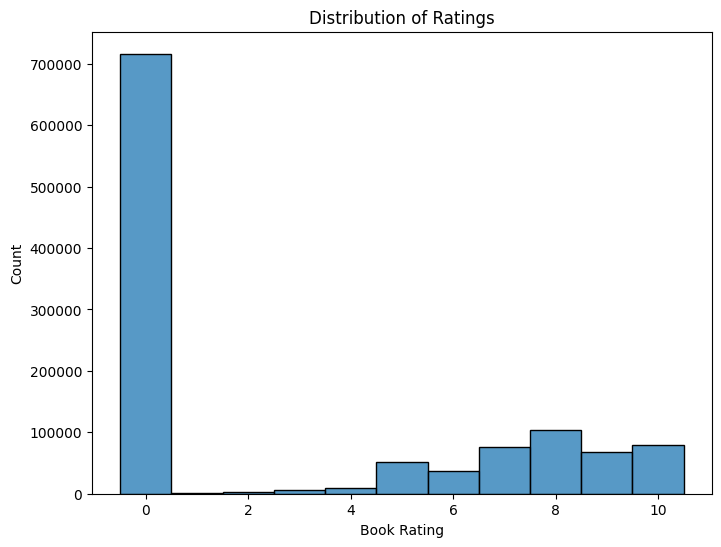

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(rating['Book_Rating'],  discrete=True, kde=False)

plt.title('Distribution of Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

From the histrogram we observed the rating range 0 to 10.Also significant of  users have not rated the books.

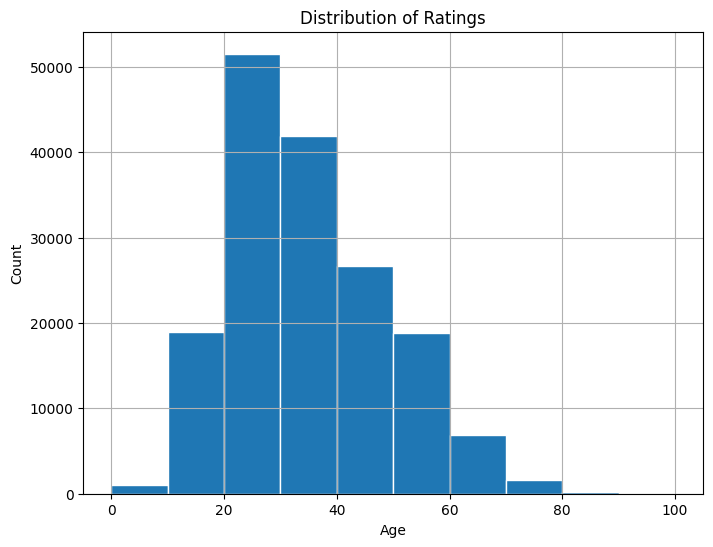

In [ ]:
plt.figure(figsize=(8, 6))
users['Age'].hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],edgecolor='white')
plt.title('Distribution of Ratings')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
#List of top users rating
Total_user=rating['User_ID'].value_counts()
Total_user

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User_ID, Length: 105283, dtype: int64

In [ ]:
#List of top rated books
Total_book =books['ISBN'].value_counts()
Total_book

0195153448    1
0785339876    1
077108482X    1
0207124310    1
0439172543    1
             ..
2877306127    1
0679869832    1
1584850884    1
2743603518    1
0767409752    1
Name: ISBN, Length: 271379, dtype: int64

In [ ]:
total_uniquebook_count=rating['ISBN'].nunique()

In [ ]:
total_ratedbook_count=rating[rating['Book_Rating'] > 0]['ISBN'].nunique()
unrated_book=total_uniquebook_count-total_ratedbook_count
unrated_book

154583

In [ ]:
total_uniqueuser_count=rating['User_ID'].nunique()
total_uniqueuser_count

105283

In [ ]:
total_rateduser_count=rating[rating['Book_Rating']!=0]['User_ID'].nunique()
unrated_user=total_uniqueuser_count-total_rateduser_count
unrated_user

27478

In [ ]:
# Combine rating data with total rating count data and Determine which books are popular while excluding less popular ones
combine_rating = rating.groupby('ISBN')['Book_Rating'].count()
popular_books = combine_rating[combine_rating >= 200]

isbn = list(popular_books.index)
popular_book = rating[rating['ISBN'].isin(isbn)]

popular_book


,User_ID,ISBN,Book_Rating
29,276755,0451166892,5
84,276788,043935806X,7
164,276832,0316781266,0
173,276847,0446364193,0
392,276896,0440241537,10
...,...,...,...
1149653,276683,0345337662,0
1149660,276688,006101351X,0
1149678,276688,0375706771,0
1149731,276688,068484267X,0


In [ ]:
user_item = popular_book.pivot(index='User_ID', columns='ISBN', values='Book_Rating')

In [ ]:
user_item.iloc[0:5, 0:10]

ISBN,0060392452,0060502258,0060915544,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060977493
User_ID,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_item.shape

(21557, 195)

In [ ]:

total_cells = user_item.size
missing_cells = user_item.isnull().sum().sum()
missing_percentage = (missing_cells / total_cells) * 100

print(f'Total cells: {total_cells}')
print(f'Missing cells: {missing_cells}')
print(f'Missing percentage: {missing_percentage:.2f}%')




Total cells: 4203615
Missing cells: 4138474
Missing percentage: 98.45%


In [ ]:
user_item= user_item.apply(lambda row: row.fillna(row.mean()), axis=1)

# Display the first 5 rows and first 10 columns
user_item.iloc[0:20, 0:10]


ISBN,0060392452,0060502258,0060915544,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060977493
User_ID,,,,,,,,,,
9,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
14,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
16,4.500000,4.500000,4.500000,4.500000,4.5,4.500000,4.500000,4.500000,4.500000,4.500000
26,9.500000,9.500000,9.500000,9.500000,9.5,9.500000,9.500000,9.500000,9.500000,9.500000
44,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
51,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000
67,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
91,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000
95,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
from scipy.sparse import csr_matrix
matrix = csr_matrix(user_item.values)
print(matrix)

  (2, 0)	4.5
  (2, 1)	4.5
  (2, 2)	4.5
  (2, 3)	4.5
  (2, 4)	4.5
  (2, 5)	4.5
  (2, 6)	4.5
  (2, 7)	4.5
  (2, 8)	4.5
  (2, 9)	4.5
  (2, 10)	4.5
  (2, 11)	4.5
  (2, 12)	4.5
  (2, 13)	4.5
  (2, 14)	4.5
  (2, 15)	4.5
  (2, 16)	4.5
  (2, 17)	4.5
  (2, 18)	4.5
  (2, 19)	4.5
  (2, 20)	4.5
  (2, 21)	4.5
  (2, 22)	4.5
  (2, 23)	4.5
  (2, 24)	4.5
  :	:
  (21556, 170)	6.5
  (21556, 171)	6.5
  (21556, 172)	6.5
  (21556, 173)	6.5
  (21556, 174)	6.5
  (21556, 175)	6.5
  (21556, 176)	6.5
  (21556, 177)	6.5
  (21556, 178)	6.5
  (21556, 179)	6.5
  (21556, 180)	6.5
  (21556, 181)	6.5
  (21556, 182)	6.5
  (21556, 183)	6.5
  (21556, 184)	6.5
  (21556, 185)	6.5
  (21556, 186)	6.5
  (21556, 187)	6.5
  (21556, 188)	6.5
  (21556, 189)	6.5
  (21556, 190)	6.5
  (21556, 191)	6.5
  (21556, 192)	6.5
  (21556, 193)	6.5
  (21556, 194)	6.5


#knn

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3)
knn.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=3)

In [ ]:
User_ID_to_predict = 16
user_index = user_item.index.get_loc(User_ID_to_predict)

distances, indices = knn.kneighbors(matrix[user_index, :].reshape(1, -1))

print("Distances:", distances)
print("Indices:", indices)

Distances: [[0.         0.00175786 0.00381438]]
Indices: [[   2 5949 4967]]


#A Python Function that takes user id as input and show the top-10 recommended books for the user.

In [ ]:
def get_top_recommendations(User_ID,k=3):
    user_index = user_item.index.get_loc(User_ID)
    distances, indices = knn.kneighbors(matrix[user_index], n_neighbors=k+1)
    similar_users = indices.flatten()[1:]
    recommended_books = user_item.iloc[similar_users].mean().sort_values(ascending=False).head(10)
    recommended_books_details = books[books['ISBN'].isin(recommended_books.index)][['Book_Title', 'Publisher', 'Image_URL_S']]
    predicted_ratings = user_item.loc[User_ID, recommended_books.index]
    recommendations = recommended_books_details.assign(predicted_rating=predicted_ratings.values)

    return recommendations

In [ ]:
def display_recommendations(recommendations):
    for index, row in recommendations.iterrows():
        print(f"Title: {row['Book_Title']}")
        print(f"Publisher: {row['Publisher']}")
        #print(f"Predicted Rating: {row['predicted_rating']:.2f}")
        print("---")

In [ ]:
#Takes user id as input and show the top-10 recommended books for the user.
user_id_input = int(input('Enter the User ID: '))

if user_id_input in user_item.index:
    recommendations = get_top_recommendations(user_id_input)
    display_recommendations(recommendations)

else:
    print(f'User with ID {user_id_input} not found in the dataset.')

Enter the User ID: 14
Title: To Kill a Mockingbird
Publisher: Little Brown & Company
---
Title: Roses Are Red (Alex Cross Novels)
Publisher: Warner Vision
---
Title: Kiss the Girls
Publisher: Warner Books
---
Title: Message in a Bottle
Publisher: Warner Vision
---
Title: The Fellowship of the Ring (The Lord of the Rings, Part 1)
Publisher: Del Rey
---
Title: 1st to Die: A Novel
Publisher: Warner Vision
---
Title: The Notebook
Publisher: Warner Books
---
Title: The Bridges of Madison County
Publisher: Warner Books
---
Title: A Walk to Remember
Publisher: Warner Books
---
Title: When the Wind Blows
Publisher: Warner Vision
---


#Takes user id and ISBN as input and show the probable rating of that book by that user.

In [ ]:
def get_probable_rating(user_id, isbn, k=3):
    if user_id in user_item.index and isbn in user_item.columns:
        user_index = user_item.index.get_loc(user_id)
        book_index = user_item.columns.get_loc(isbn)
        distances, indices = knn.kneighbors(matrix[user_index], n_neighbors=k+1)
        similar_users = indices.flatten()[1:]
        predicted_rating = user_item.iloc[similar_users, book_index].mean()

        print(f'Distance to similar users: {distances.flatten()[1:]}')
        print(f'Users considered (based on common book ratings): {user_item.index[similar_users].tolist()}')
        print(f'Top {k} Nearest Neighbors Ratings: {user_item.iloc[similar_users, book_index].tolist()}')
        print(f'Probable Rating by User {user_id} for Book {isbn}: {predicted_rating:.2f}')

    else:
        print('User or book not found in the dataset.')
        return None

In [ ]:
user_id_input = int(input('Enter the User ID: '))
isbn_input = str(input('Enter the target ISBN: '))

get_probable_rating(user_id_input, isbn_input)

Enter the User ID: 254
Enter the target ISBN: 0060502258
Distance to similar users: [0.15508054 0.17084632 0.17310752]
Users considered (based on common book ratings): [160393, 54578, 209631]
Top 3 Nearest Neighbors Ratings: [2.5714285714285716, 2.0, 2.0]
Probable Rating by User 254 for Book 0060502258: 2.19
